In [1]:
import pandas as pd
import numpy as np
import os
import requests
import json
import matplotlib
from datetime import datetime

In [2]:
pd.read_csv('data_sample_temps.csv')

C:\Users\justi\AppData\Local\Temp\ipykernel_20108\3135659391.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('data_sample_temps.csv')


,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
0,0,4E9E2DE0B3699349,electric_bike,2022-08-11 09:20:36.833,2022-08-11 09:39:29.381,6 Ave & Canal St,5500.07,Sharon St & Olive St,5323.06,40.722377,-74.005719,40.715342,-73.938651,member,2022-08-11,26.6,both
1,1,3B404818EF3DD6F5,electric_bike,2022-10-30 14:30:13.301,2022-10-30 14:35:22.363,Broadway & E 14 St,5905.12,1 Ave & E 18 St,5854.09,40.734546,-73.990741,40.733812,-73.980544,member,2022-10-30,12.5,both
2,2,4E04E1A1EE7BD3DA,electric_bike,2022-05-24 17:47:27.559,2022-05-24 18:01:47.374,Lexington Ave & E 24 St,6089.07,Allen St & Hester St,5342.1,40.740268,-73.984154,40.716059,-73.991908,member,2022-05-24,17.4,both
3,3,6ABCD25EB30C6E34,electric_bike,2022-08-03 10:06:39.288,2022-08-03 10:09:25.145,E 20 St & Park Ave,6055.08,W 13 St & 5 Ave,5947.04,40.738274,-73.987520,40.735445,-73.994310,member,2022-08-03,27.6,both
4,4,19111D75A2D038E7,classic_bike,2022-07-14 07:22:47.005,2022-07-14 07:49:30.182,W 67 St & Broadway,7116.04,E 56 St & Madison Ave,6732.01,40.774925,-73.982666,40.761573,-73.972628,member,2022-07-14,26.6,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298383,298383,C5A45CECAA5A6EA8,classic_bike,2022-09-26 10:18:41.172,2022-09-26 10:46:59.713,E 27 St & Park Ave S,6131.13,W 40 St & 5 Ave,6474.02,40.742752,-73.984716,40.752269,-73.982079,member,2022-09-26,19.4,both
298384,298384,CCFA019DF3C3324D,electric_bike,2022-07-29 21:08:28.952,2022-07-29 21:55:26.252,E 56 St & 3 Ave,6691.11,E 169 St & Fox St,8024.05,40.759172,-73.967415,40.827184,-73.893721,casual,2022-07-29,28.2,both
298385,298385,A679D79EC6DFC7D4,classic_bike,2022-04-10 11:00:06.186,2022-04-10 11:29:49.508,12 Ave & 36 St,3056.05,Flatbush Ave & Ocean Ave,3704.04,40.643546,-73.986418,40.663657,-73.963014,casual,2022-04-10,8.6,both
298386,298386,D61C545DF92C52BE,electric_bike,2022-11-04 09:54:04.381,2022-11-04 10:07:47.531,5 Ave & E 93 St,7372.1,1 Ave & E 68 St,6822.09,40.785872,-73.957448,40.765005,-73.958185,member,2022-11-04,15.2,both


In [6]:
df = pd.read_csv('data_sample_temps.csv')

C:\Users\justi\AppData\Local\Temp\ipykernel_20108\2162800982.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_sample_temps.csv')


In [17]:
df_temp = df.set_index('date').sort_index()

<Axes: xlabel='date'>

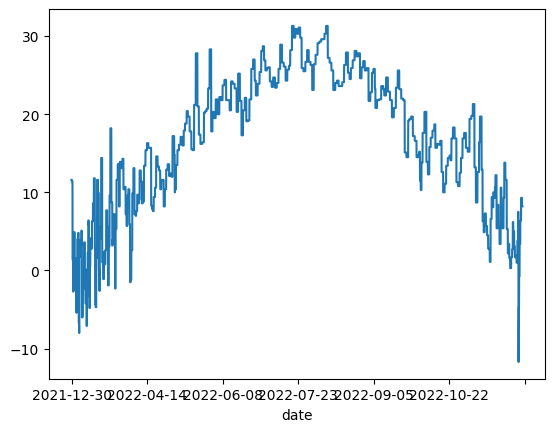

In [19]:
df_temp['avgTemp'].plot()

In [20]:
from matplotlib import pyplot as plt

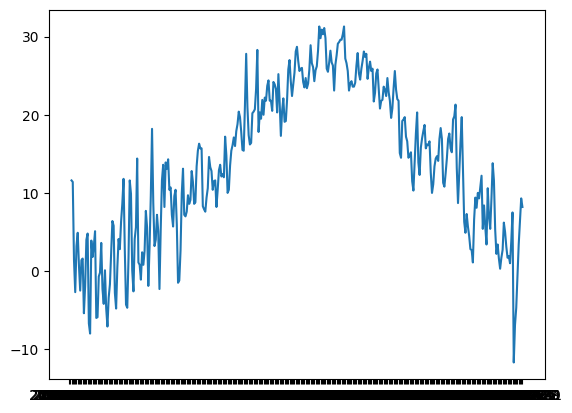

In [21]:
plt.plot(df_temp['avgTemp'])

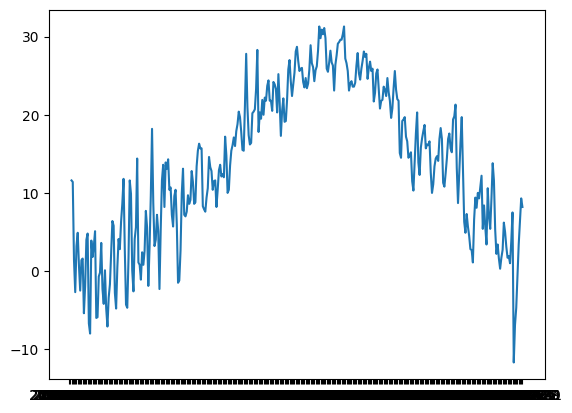

In [22]:
plt.plot(df_temp['avgTemp'])
plt.show()

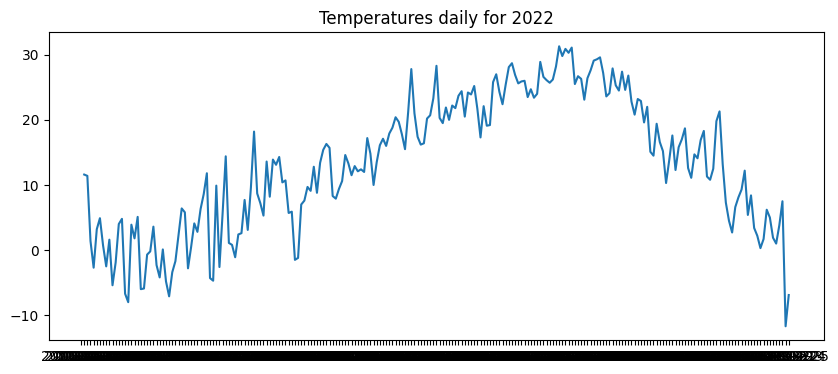

In [23]:
df_2022=df_temp.drop_duplicates(subset=['avgTemp'])

plt.figure(figsize=(10,4))
plt.title('Temperatures daily for 2022')
plt.plot(df_2022['avgTemp'])
plt.show()

In [26]:
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [28]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = 'date', how = 'outer')
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2018-01-01'].shape) # Check
print("Shape of January 2nd is", df[df['date'] == '2018-01-02'].shape) # Second check

_merge
both         298384
left_only         4
Name: count, dtype: int64
Shape of January 1st is (0, 18)
Shape of January 2nd is (0, 18)


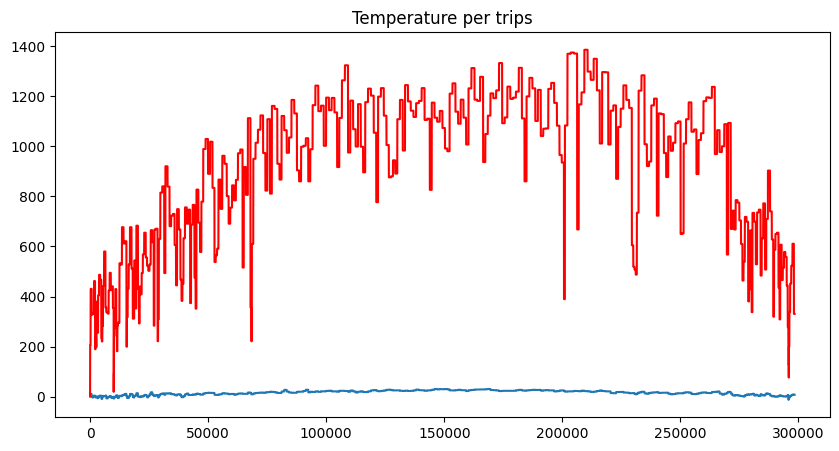

In [29]:
plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df['avgTemp'])
plt.plot(df['bike_rides_daily'], color = 'red')
plt.show()

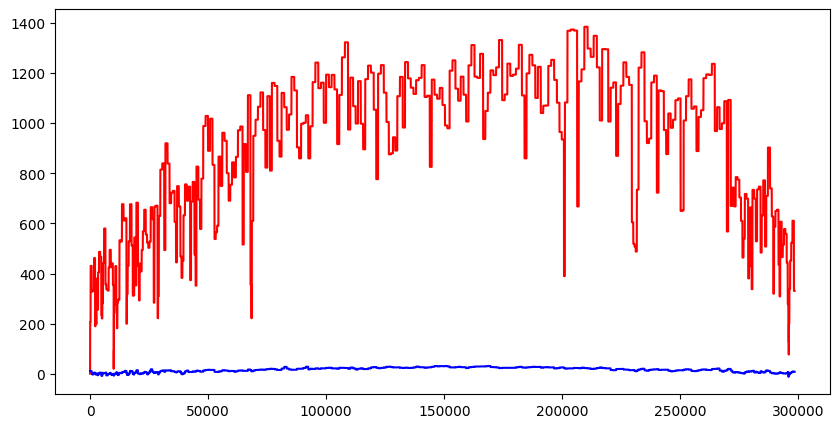

In [34]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(df['bike_rides_daily'],color = "red")
ax.plot(df['avgTemp'], color = 'blue')

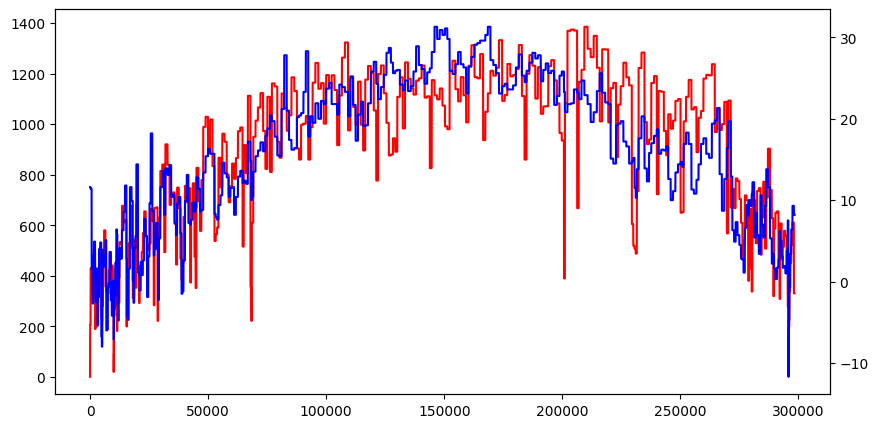

In [35]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(df['bike_rides_daily'],color = "red")
ax2 = ax.twinx()
ax2.plot(df["avgTemp"], color = "blue")
plt.show()

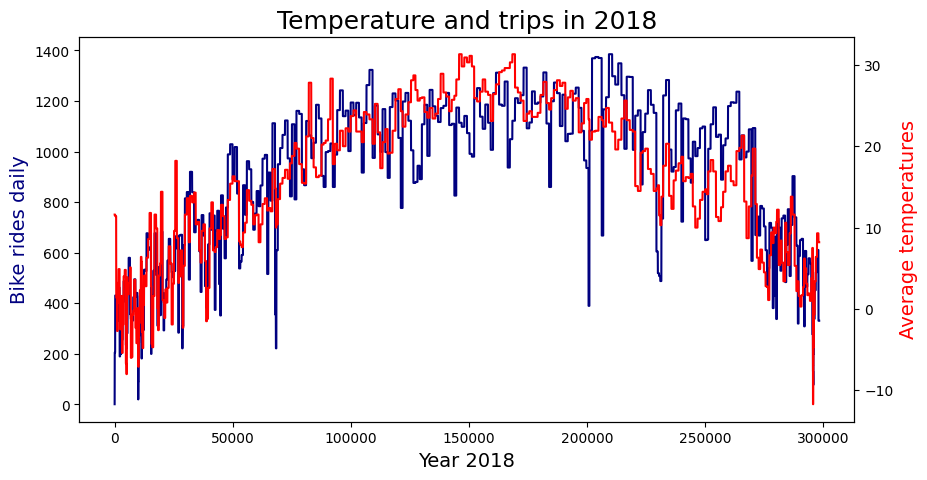

In [36]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2018", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatures on the y-axis using second axis object
ax2.plot(df['avgTemp'], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2018', fontsize = 18)
plt.show()

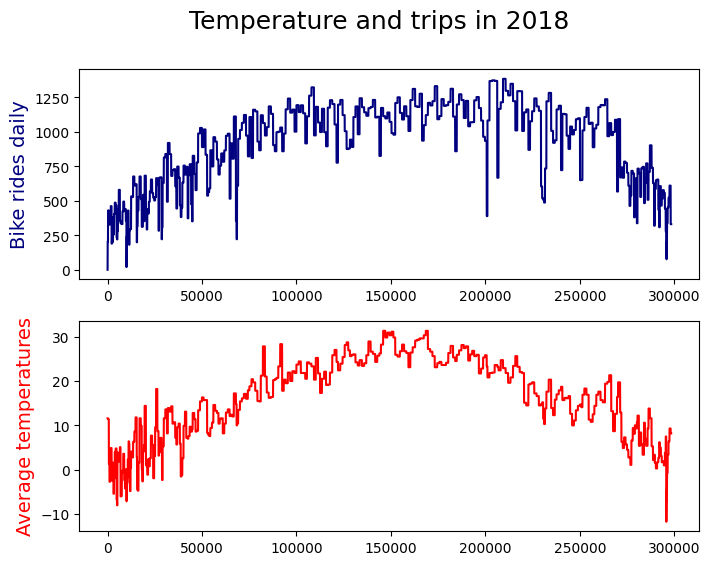

In [40]:
# Create figure and axis objects with subplots() and details

Fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatures on the y-axis using second axis object
ax[1].plot(df["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2018', fontsize = 18)

plt.show()

In [ ]:
#I was able to use the matplotlib plot() method in columns and assign specific columns from the temeratures data frame to the x and y axis'. In doing this I was able to also creat a dual axis plot that shows two two colmns of information on the same axis with the plots overlaying.